In [1]:
# Python std libraries:
import urllib.request
import yaml

# Python external libraries:
from matplotlib.path import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

# Jupyter Notebook complements:
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
# The CSV file was donwloaded from: 
# https://drive.google.com/drive/u/1/folders/1taa5fnjqtZLWYHpdQVq_3w3pvspSKHDX
df = pd.read_csv('export-2019-06-11T15_03_01.084Z.csv')
df.head(5)

,ID,DataRow ID,Labeled Data,Label,Created By,Project Name,Created At,Updated At,Seconds to Label,External ID,Agreement,Benchmark Agreement,Benchmark ID,Benchmark Reference ID,Dataset Name,Reviews,View Label,Masks
0,cjwbohbn5vmmf08388tabmc1n,cjw9z0o0c2ddb0ctn6ebqdyni,https://storage.googleapis.com/labelbox-193903...,"{""Trees1"":[{""geometry"":[{""x"":2,""y"":325},{""x"":1...",aleprajwal@gmail.com,Omdena Trees - Australia dataset - team4,1559282400000,1559371017000,2160.654,chip_145.76404842951132_-17.135386636381604.jpg,0.17395,NaN,NaN,NaN,Australia_49imgs_team4,"[{""id"":""cjwrxltbsua3u0811emowpcta"",""score"":1,""...",https://image-segmentation-v4.labelbox.com?pro...,"{""Trees1"":""https://faas-gateway.labelbox.com/f..."
1,cjwd58p798zu80a08dvlw71zw,cjw9z0o0c2ddb0ctn6ebqdyni,https://storage.googleapis.com/labelbox-193903...,"{""Trees1"":[{""geometry"":[{""x"":997,""y"":622},{""x""...",arafatbhossain@gmail.com,Omdena Trees - Australia dataset - team4,1559371017000,1559371017000,803.292,chip_145.76404842951132_-17.135386636381604.jpg,0.15213,NaN,NaN,NaN,Australia_49imgs_team4,"[{""id"":""cjwrxls7ttgl10800s1xi3yl1"",""score"":1,""...",https://image-segmentation-v4.labelbox.com?pro...,"{""Trees1"":""https://faas-gateway.labelbox.com/f..."
2,cjwd5imnkadd80866uyalwsf6,cjw9z0o0c2ddf0ctn4wyx1b2m,https://storage.googleapis.com/labelbox-193903...,"{""Trees1"":[{""geometry"":[{""x"":627,""y"":3},{""x"":7...",arafatbhossain@gmail.com,Omdena Trees - Australia dataset - team4,1559371480000,1559397438000,462.522,chip_145.76404842951132_-17.143902626320518.jpg,0.14323,NaN,NaN,NaN,Australia_49imgs_team4,"[{""id"":""cjwrxkirvtiip0a26q2l0100y"",""score"":-1,...",https://image-segmentation-v4.labelbox.com?pro...,"{""Trees1"":""https://faas-gateway.labelbox.com/f..."
3,cjwd64dmm9q3w0828ij1l4iqe,cjw9z0o0c2ddj0ctn8s3phjdb,https://storage.googleapis.com/labelbox-193903...,"{""Trees1"":[{""geometry"":[{""x"":1,""y"":1},{""x"":1,""...",arafatbhossain@gmail.com,Omdena Trees - Australia dataset - team4,1559372495000,1559399299000,1007.624,chip_145.76972575613726_-17.10983866656486.jpg,0.10035,NaN,NaN,NaN,Australia_49imgs_team4,"[{""id"":""cjwrxk8vau93b0836k0m0bps9"",""score"":-1,...",https://image-segmentation-v4.labelbox.com?pro...,"{""Trees1"":""https://faas-gateway.labelbox.com/f..."
4,cjwd6hsczal0k08660rpd6eci,cjw9z0o0c2ddn0ctn0op3gjsi,https://storage.googleapis.com/labelbox-193903...,"{""Trees1"":[{""geometry"":[{""x"":941,""y"":527},{""x""...",arafatbhossain@gmail.com,Omdena Trees - Australia dataset - team4,1559373120000,1559400453000,624.930,chip_145.76972575613726_-17.11267732987783.jpg,0.22565,NaN,NaN,NaN,Australia_49imgs_team4,"[{""id"":""cjwrxjta3u9240811um59sweg"",""score"":1,""...",https://image-segmentation-v4.labelbox.com?pro...,"{""Trees1"":""https://faas-gateway.labelbox.com/f..."


In [3]:
# Set a fixed random index for image testing:
index = 38

# Print URL of original image to verify it works:
img_url = df['Labeled Data'][index]
display(f'Original image for index {index}: {img_url}')
display(HTML('<img src={} width="100%">'.format(img_url)))

'Original image for index 38: https://storage.googleapis.com/labelbox-193903.appspot.com/cjw3o5h4r67k50838jryyg0dx%2Fc4d97f19-1764-8bd3-1427-7b5e26070b36-chip_145.79243506264103_-17.107000003251887.jpg'

In [4]:
# Parse data using YAML:
data = yaml.safe_load(df['Label'][index])

# Display the list with all label polygons:
display(data['Trees1'])

[{'geometry': [{'x': 18, 'y': 997},
   {'x': 22, 'y': 983},
   {'x': 26, 'y': 989},
   {'x': 31, 'y': 981},
   {'x': 32, 'y': 973},
   {'x': 38, 'y': 975},
   {'x': 43, 'y': 976},
   {'x': 44, 'y': 983},
   {'x': 41, 'y': 990},
   {'x': 36, 'y': 993},
   {'x': 26, 'y': 997}]},
 {'geometry': [{'x': 57, 'y': 971},
   {'x': 63, 'y': 978},
   {'x': 59, 'y': 986},
   {'x': 61, 'y': 993},
   {'x': 66, 'y': 985},
   {'x': 66, 'y': 998},
   {'x': 78, 'y': 985},
   {'x': 73, 'y': 969},
   {'x': 66, 'y': 967}]},
 {'geometry': [{'x': 101, 'y': 988},
   {'x': 105, 'y': 980},
   {'x': 111, 'y': 976},
   {'x': 110, 'y': 969},
   {'x': 110, 'y': 960},
   {'x': 109, 'y': 947},
   {'x': 100, 'y': 955},
   {'x': 92, 'y': 959},
   {'x': 99, 'y': 945},
   {'x': 94, 'y': 937},
   {'x': 106, 'y': 937},
   {'x': 103, 'y': 927},
   {'x': 117, 'y': 930},
   {'x': 123, 'y': 937},
   {'x': 135, 'y': 946},
   {'x': 140, 'y': 952},
   {'x': 137, 'y': 957},
   {'x': 138, 'y': 965},
   {'x': 142, 'y': 975},
   {'x':

In [5]:
# Build parsed list of (x, y) coordinates into np.array:
full_data = [[[*item.values()] for item in pack['geometry']]
             for pack in data['Trees1']]
full_data = np.array(full_data)
display(full_data)

array([list([[18, 997], [22, 983], [26, 989], [31, 981], [32, 973], [38, 975], [43, 976], [44, 983], [41, 990], [36, 993], [26, 997]]),
       list([[57, 971], [63, 978], [59, 986], [61, 993], [66, 985], [66, 998], [78, 985], [73, 969], [66, 967]]),
       list([[101, 988], [105, 980], [111, 976], [110, 969], [110, 960], [109, 947], [100, 955], [92, 959], [99, 945], [94, 937], [106, 937], [103, 927], [117, 930], [123, 937], [135, 946], [140, 952], [137, 957], [138, 965], [142, 975], [138, 983], [126, 987], [123, 987], [116, 987]]),
       list([[144, 926], [149, 919], [145, 913], [151, 908], [159, 906], [168, 910], [169, 918], [171, 932], [165, 944], [153, 940], [147, 936], [147, 931], [140, 935], [132, 931]]),
       list([[188, 973], [191, 970], [197, 967], [184, 956], [201, 963], [205, 955], [201, 953], [206, 944], [198, 938], [209, 934], [215, 931], [212, 922], [207, 915], [201, 915], [201, 906], [199, 903], [208, 902], [205, 891], [212, 889], [214, 883], [215, 879], [208, 877], [2

In [6]:
# Get name of image and download it from remote:
img_name = img_url.split('/')[-1]
urllib.request.urlretrieve(img_url, img_name)

('cjw3o5h4r67k50838jryyg0dx%2Fc4d97f19-1764-8bd3-1427-7b5e26070b36-chip_145.79243506264103_-17.107000003251887.jpg',
 <http.client.HTTPMessage at 0x127d33c18>)

(1000, 1000, 3)

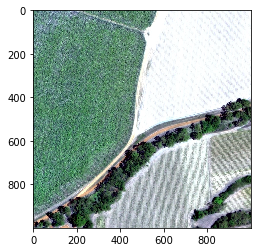

In [7]:
# Load image, print shape and plot image:
img = cv2.imread(img_name)
display(img.shape)
plt.imshow(img)

In [8]:
# List number of labeled polygons in image:
len(full_data)

23

In [9]:
# METHOD 1:
# Create a mask by computing the Convex Hull with
# the labeled polygons.

# Black and white base images for output:
out = np.zeros_like(img)
white = 255*np.ones_like(img)

# For labelled polygon in full_data:
for poly in full_data:
    # Build an empty mask:
    mask = np.zeros((img.shape[0], img.shape[1]))
    try:
        # Compute Convex Hull and apply to mask:
        cv2.fillConvexPoly(mask, np.array(poly), 1)
        mask = mask.astype(np.bool)
        # out[mask] += img[mask]
        out[mask] += white[mask]
    except:
        continue

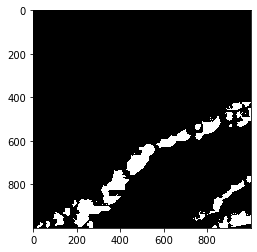

In [10]:
# Plot output mask:
plt.imshow(out)

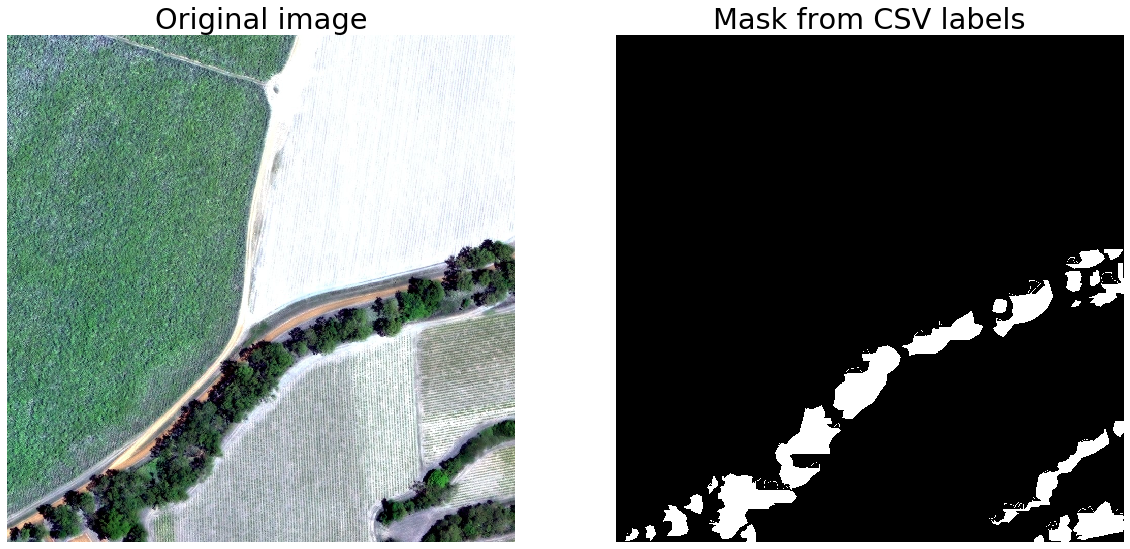

In [11]:
# Build output image for comparisson:

plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 24})

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(out)
plt.title('Mask from CSV labels')
plt.axis('off')

plt.savefig('mask_demo_convex_hull.png')

# NOTE:
# A thing that must be noticed is that this method 
# leaves non-filled spaces...

In [12]:
# METHOD 2:
# Create a mask by computing verifying if each point
# is inside the labeled polygons.

# Black and white base images for output:
out = np.zeros_like(img)
white = 255*np.ones_like(img)

# Create grid points for verification:
nx, ny = img.shape[0], img.shape[1]
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = x.flatten(), y.flatten()
points = np.vstack((x,y)).T

# For labelled polygon in full_data:
for poly in full_data:
    # Compute polygon path:
    poly_verts = np.array(poly)
    p = Path(poly_verts)
    
    # Verify which points of grid are inside each polygon:
    mask = p.contains_points(points)
    mask = mask.reshape((ny,nx))
    mask = mask.astype(np.bool)
    out[mask] += white[mask]

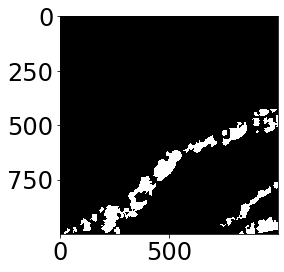

In [13]:
# Plot output mas:
plt.imshow(out)

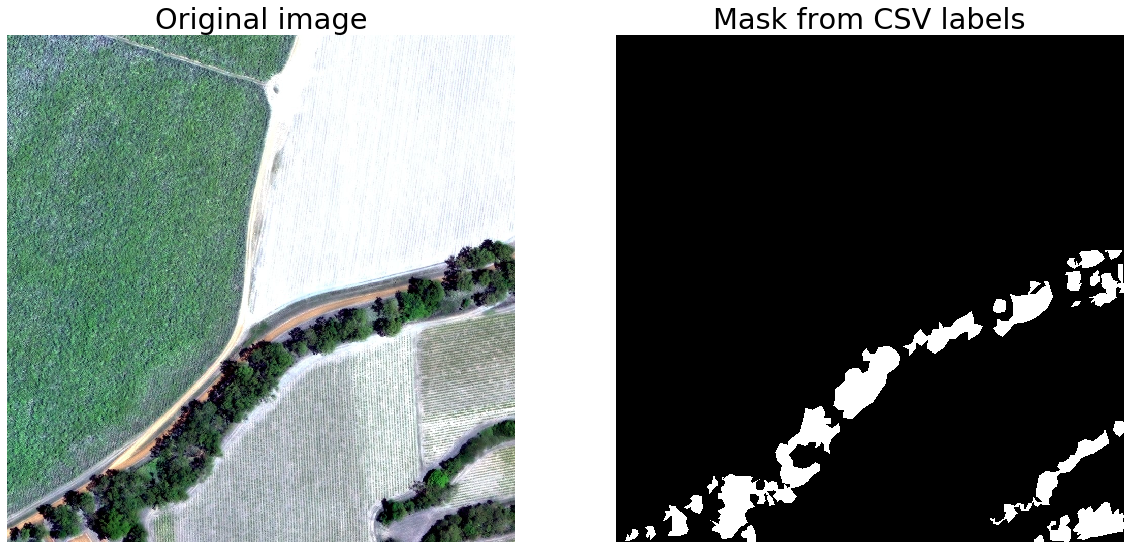

In [14]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 24})

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(out)
plt.title('Mask from CSV labels')
plt.axis('off')

plt.savefig('mask_demo_inside_points.png')

# NOTE:
# A thing that must be noticed is that this method takes
# a bit more time but computes correcctly the mask.